<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Функции-для-построения-графиков" data-toc-modified-id="Функции-для-построения-графиков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функции для построения графиков</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-количественных-данных" data-toc-modified-id="Анализ-количественных-данных-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Анализ количественных данных</a></span></li><li><span><a href="#Анализ-категориальных-данных" data-toc-modified-id="Анализ-категориальных-данных-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Анализ категориальных данных</a></span></li><li><span><a href="#Анализ-данных-о-времени" data-toc-modified-id="Анализ-данных-о-времени-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Анализ данных о времени</a></span></li></ul></li><li><span><a href="#Анализ-корреляции-признаков" data-toc-modified-id="Анализ-корреляции-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Анализ корреляции признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Обучение-LightGBM" data-toc-modified-id="Обучение-LightGBM-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Обучение LightGBM</a></span></li><li><span><a href="#Обучение-LinearRegression" data-toc-modified-id="Обучение-LinearRegression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение LinearRegression</a></span></li><li><span><a href="#Обучение-DecisionTreeRegressor" data-toc-modified-id="Обучение-DecisionTreeRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение DecisionTreeRegressor</a></span></li><li><span><a href="#Обучение-CatBoost" data-toc-modified-id="Обучение-CatBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Обучение CatBoost</a></span></li><li><span><a href="#Итоговые-результаты-моделей" data-toc-modified-id="Итоговые-результаты-моделей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Итоговые результаты моделей</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Определение стоимости автомобилей

Нам передали данные о продажах автомобилей сервиса по продаже автомобилей с пробегом «Не бит, не крашен». Необходимо разработать приложение для расчета рыночной стоимости автомобиля.

Признаки
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя
- Price — цена (евро)


***Цель исследования***:
1. Обработать полученные данные
2. Проанализировать полученные данные
3. Обучить разные модели
4. Предложить лучшую модель по критериям:
- качество предсказания;
- время обучения модели;
- время предсказания модели.


***Ход исследования***:
1. Получим данные из исходных датасетов
2. Предобработаем данные: поищем пропуски, дубликаты, удалим или заменим при возможности
3. Проведем исследовательский анализ 
4. Поищем корреляцию между признаками чтобы не стоить модель по похожим признакам
5. Подготовим данные для построения модели МО с использованием пайплайнов, рассмотрим несколько моделей и параметров
6. Оценим полученные модели по заданным критериям
7. Сделаем общий вывод по работе, дадим рекомендации сервису по выбору модели

In [1]:
!pip install -q phik
!pip install -q shap
!pip install -q scikit-learn==1.5.0
!pip install --upgrade shap matplotlib seaborn -q
!pip install lightgbm -q
!pip install catboost -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import phik
from phik.report import plot_correlation_matrix
from phik import phik_matrix
import shap
from IPython.display import Markdown, display
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import time
from datetime import datetime
sns.set_theme(style="whitegrid")
RANDOM_STATE = 42

### Загрузка данных

In [3]:
try:
    cars = pd.read_csv('/datasets/autos.csv', sep=",")
    print('Код выполняется на платформе')
except FileNotFoundError:
    cars = pd.read_csv('datasets/autos.csv', sep=",")
    print('Код выполняется локально')

Код выполняется локально


In [4]:
cars.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


### Предобработка данных

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
cars[['DateCrawled', 'DateCreated', 'LastSeen']] = cars[['DateCrawled', 'DateCreated', 'LastSeen']].apply(pd.to_datetime)

Довольно много пропусков в данных, попробуем их заполнить, где это возможно, например, тип авто, так как он зависит от модели и марки, рассмотрим на примере гольфа.

In [7]:
cars[cars['Model'] == 'golf'][cars['Brand'] == 'volkswagen']['VehicleType'].unique()

C:\Users\paulv\AppData\Local\Temp\ipykernel_17504\2704943117.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cars[cars['Model'] == 'golf'][cars['Brand'] == 'volkswagen']['VehicleType'].unique()


array([nan, 'small', 'sedan', 'bus', 'other', 'wagon', 'convertible',
       'coupe', 'suv'], dtype=object)

Довольно странно видеть такой список типов авто для гольфа, поэтому данные заменять не будем, видимо где-то есть ошибки, которые без дополнительной информации не исправить.

In [8]:
cars.drop_duplicates(inplace=True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354365 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354365 non-null  datetime64[ns]
 1   Price              354365 non-null  int64         
 2   VehicleType        316875 non-null  object        
 3   RegistrationYear   354365 non-null  int64         
 4   Gearbox            334532 non-null  object        
 5   Power              354365 non-null  int64         
 6   Model              334660 non-null  object        
 7   Kilometer          354365 non-null  int64         
 8   RegistrationMonth  354365 non-null  int64         
 9   FuelType           321470 non-null  object        
 10  Brand              354365 non-null  object        
 11  Repaired           283211 non-null  object        
 12  DateCreated        354365 non-null  datetime64[ns]
 13  NumberOfPictures   354365 non-null  int64        

Немного дубликатов удалили, пропуски заполним в пайплайне

In [10]:
cars.describe().T

,count,mean,min,25%,50%,75%,max,std
DateCrawled,354365,2016-03-21 12:58:09.520460544,2016-03-05 14:06:22,2016-03-13 11:52:33,2016-03-21 17:50:55,2016-03-29 14:37:20,2016-04-07 14:36:58,NaN
Price,354365.0,4416.67983,0.0,1050.0,2700.0,6400.0,20000.0,4514.176349
RegistrationYear,354365.0,2004.234481,1000.0,1999.0,2003.0,2008.0,9999.0,90.228466
Power,354365.0,110.093816,0.0,69.0,105.0,143.0,20000.0,189.85133
Kilometer,354365.0,128211.363989,5000.0,125000.0,150000.0,150000.0,150000.0,37905.083858
RegistrationMonth,354365.0,5.71465,0.0,3.0,6.0,9.0,12.0,3.726432
DateCreated,354365,2016-03-20 19:12:06.583042560,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
NumberOfPictures,354365.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PostalCode,354365.0,50508.5038,1067.0,30165.0,49413.0,71083.0,99998.0,25783.100078
LastSeen,354365,2016-03-29 23:51:06.766184960,2016-03-05 14:15:08,2016-03-23 02:50:03,2016-04-03 15:15:52,2016-04-06 10:15:19,2016-04-07 14:58:51,NaN


Видим аномальные значения в некоторых колонках, удалим их:
год регистрации больше, чем текущий, или слишком старый, раритетные авто следует рассматривать индивидуально, их тоже исключим;
мощность больше 500 л.с. (даже если такие есть, то это редкие экземпляры, и их лучше рассматривать отдельно)

In [11]:
cars.describe(include='datetime')

,DateCrawled,DateCreated,LastSeen
count,354365,354365,354365
mean,2016-03-21 12:58:09.520460544,2016-03-20 19:12:06.583042560,2016-03-29 23:51:06.766184960
min,2016-03-05 14:06:22,2014-03-10 00:00:00,2016-03-05 14:15:08
25%,2016-03-13 11:52:33,2016-03-13 00:00:00,2016-03-23 02:50:03
50%,2016-03-21 17:50:55,2016-03-21 00:00:00,2016-04-03 15:15:52
75%,2016-03-29 14:37:20,2016-03-29 00:00:00,2016-04-06 10:15:19
max,2016-04-07 14:36:58,2016-04-07 00:00:00,2016-04-07 14:58:51


In [12]:
cars = cars[cars['RegistrationYear'] < 2017]
cars = cars[cars['RegistrationYear'] > 1980]
cars = cars[cars['Power'] < 500]

In [13]:
cars['NumberOfPictures'].unique()

array([0])

In [14]:
cars.drop(columns='NumberOfPictures', inplace=True)

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335348 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        335348 non-null  datetime64[ns]
 1   Price              335348 non-null  int64         
 2   VehicleType        313174 non-null  object        
 3   RegistrationYear   335348 non-null  int64         
 4   Gearbox            318427 non-null  object        
 5   Power              335348 non-null  int64         
 6   Model              318763 non-null  object        
 7   Kilometer          335348 non-null  int64         
 8   RegistrationMonth  335348 non-null  int64         
 9   FuelType           309144 non-null  object        
 10  Brand              335348 non-null  object        
 11  Repaired           272134 non-null  object        
 12  DateCreated        335348 non-null  datetime64[ns]
 13  PostalCode         335348 non-null  int64        

### Исследовательский анализ данных

#### Функции для построения графиков

In [16]:
def figures_for_num(data, numeric_col):
    if len(numeric_col) != 1:
        fig, axes = plt.subplots(len(numeric_col), 2, figsize=(10,len(numeric_col)*5))
        i = 0
        plt.subplots_adjust(hspace=0.3)
        for column in numeric_col:
            axes[i,0].set_title(f'KDE для параметра \n {column}')
            axes[i,1].set_title(f'Boxplot для параметра \n {column}')
            sns.kdeplot(ax = axes[i,0], data=data, x=column)
            sns.boxplot(ax = axes[i,1], data=data, x=column)
            i += 1
    else:
        column = numeric_col[0]
        fig, axes = plt.subplots(1, 2, figsize=(10,4))
        plt.subplots_adjust(hspace=0.3)
        axes[0].set_title(f'KDE для параметра \n {column}')
        axes[1].set_title(f'Boxplot для параметра \n {column}')
        sns.kdeplot(ax = axes[0], data=data, x=column)
        sns.boxplot(ax = axes[1], data=data, x=column)

In [17]:
def figures_for_category(data, category_col):
    if len(category_col) != 1:
        fig, axes = plt.subplots(len(category_col), figsize=(10,len(category_col)*5))
        plt.subplots_adjust(hspace=0.3)
        i = 0
        for column in category_col:
            axes[i].set_title(f'Гистограмма для параметра \n {category_col[i]}')
            ax = sns.countplot(ax = axes[i], data=data, x=column,
                               order=data[column].value_counts(ascending=False).iloc[:7].index)
            
            abs_values = data[column].value_counts(ascending=False).values[:7]
            ax.bar_label(container=ax.containers[0], labels=abs_values)
            i += 1
    else:
        column = category_col[0]
        ax = sns.countplot(data=data, x=column,
                           order=data[column].value_counts(ascending=False).iloc[:7].index) 
        abs_values = data[column].value_counts(ascending=False).values[:7]
        ax.bar_label(container=ax.containers[0], labels=abs_values)
        ax.set_title(f'Гистограмма для параметра \n {column}')

#### Анализ данных

##### Анализ количественных данных

In [18]:
cars.describe().T

,count,mean,min,25%,50%,75%,max,std
DateCrawled,335348,2016-03-21 12:40:34.296778240,2016-03-05 14:06:22,2016-03-13 11:37:02.750000128,2016-03-21 17:45:43.500000,2016-03-29 14:38:19,2016-04-07 14:36:58,NaN
Price,335348.0,4447.939642,0.0,1099.0,2750.0,6499.0,20000.0,4524.814133
RegistrationYear,335348.0,2002.869306,1981.0,1999.0,2003.0,2007.0,2016.0,6.011678
Power,335348.0,107.920814,0.0,70.0,105.0,143.0,490.0,62.420099
Kilometer,335348.0,128584.172263,5000.0,125000.0,150000.0,150000.0,150000.0,37390.589509
RegistrationMonth,335348.0,5.776221,0.0,3.0,6.0,9.0,12.0,3.70508
DateCreated,335348,2016-03-20 18:52:24.272815104,2014-03-10 00:00:00,2016-03-13 00:00:00,2016-03-21 00:00:00,2016-03-29 00:00:00,2016-04-07 00:00:00,NaN
PostalCode,335348.0,50618.994254,1067.0,30177.0,49497.0,71159.0,99998.0,25788.449587
LastSeen,335348,2016-03-30 00:20:13.754774272,2016-03-05 14:15:08,2016-03-23 04:50:09.750000128,2016-04-03 16:28:22,2016-04-06 10:16:04.249999872,2016-04-07 14:58:51,NaN


In [19]:
numeric_columns = cars.select_dtypes('number').columns.to_list()
numeric_columns

['Price',
 'RegistrationYear',
 'Power',
 'Kilometer',
 'RegistrationMonth',
 'PostalCode']

CPU times: total: 9.44 s
Wall time: 9.44 s


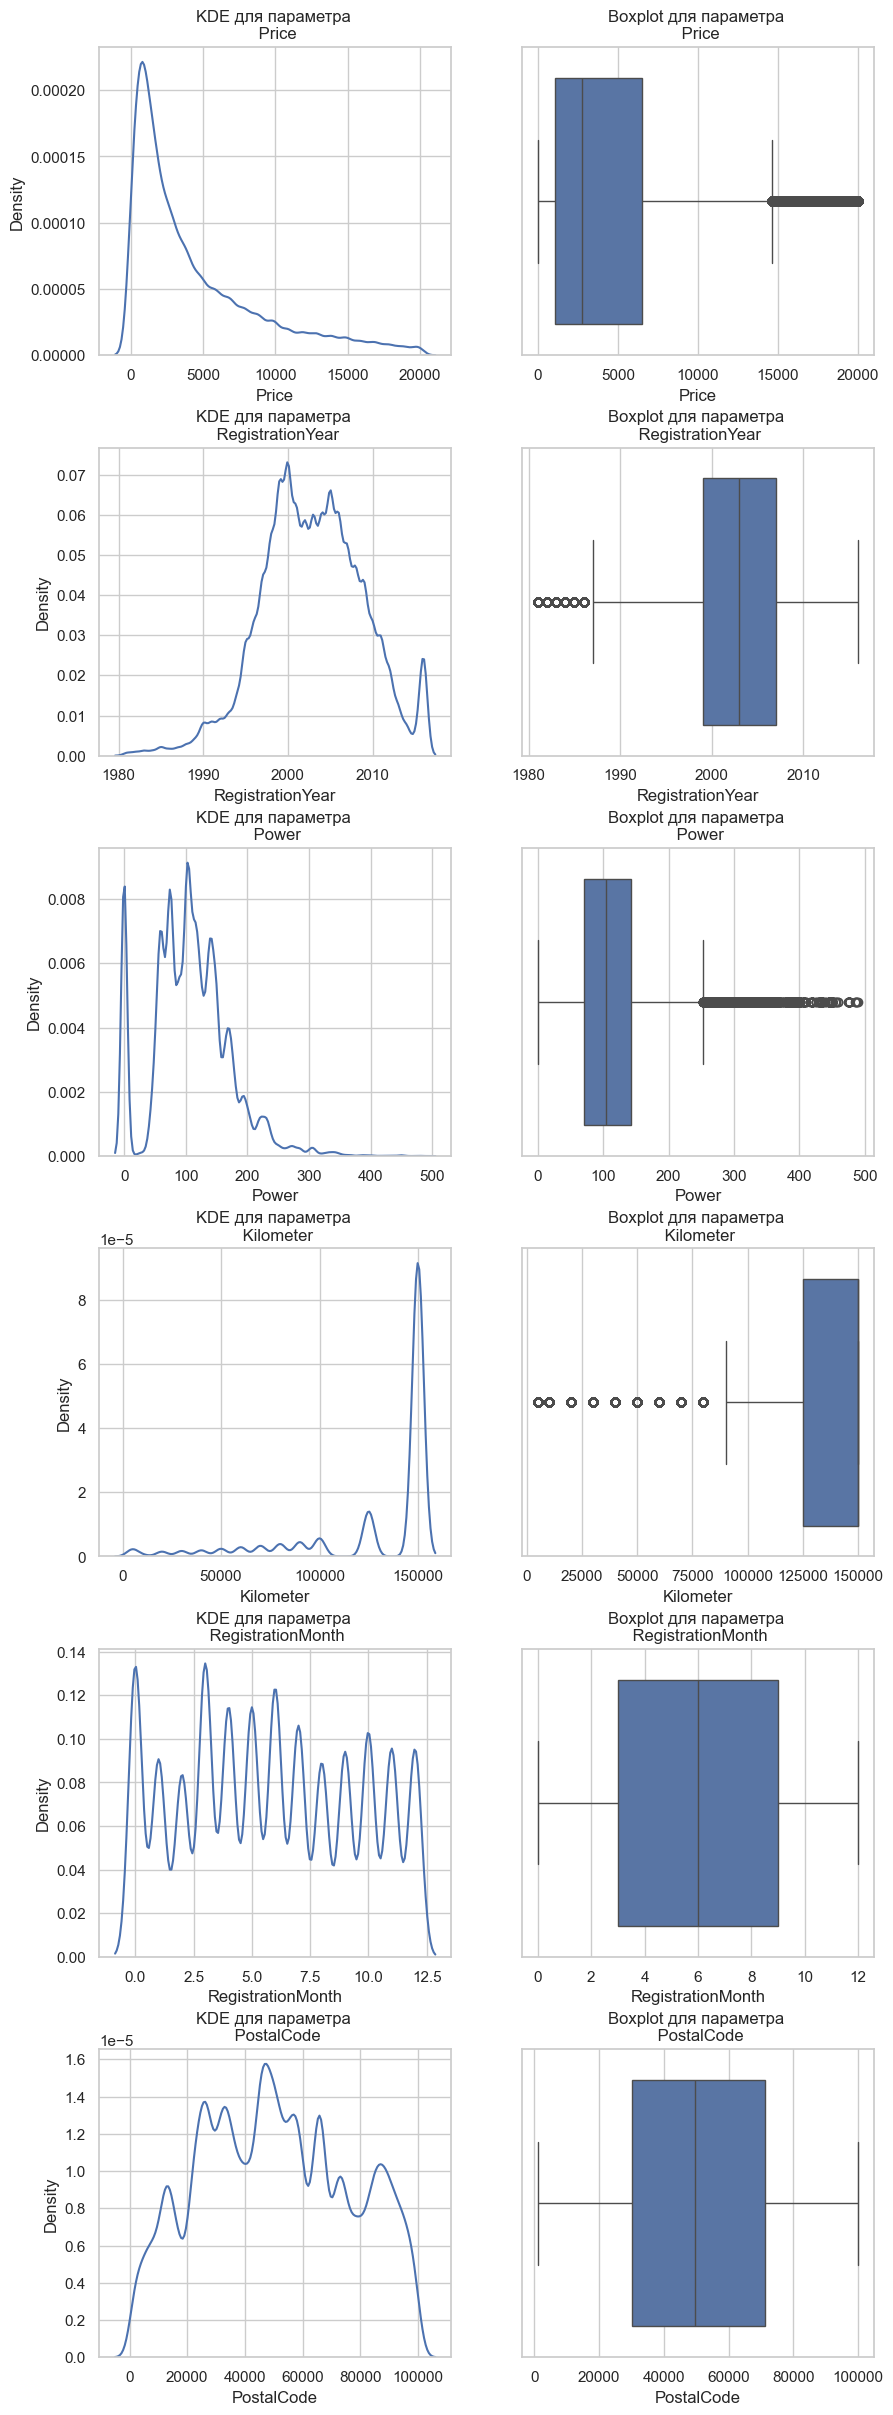

In [20]:
%%time
figures_for_num(cars, numeric_columns)

##### Анализ категориальных данных

In [21]:
category_col = cars.select_dtypes('object').columns.to_list()
category_col

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

CPU times: total: 1.64 s
Wall time: 1.66 s


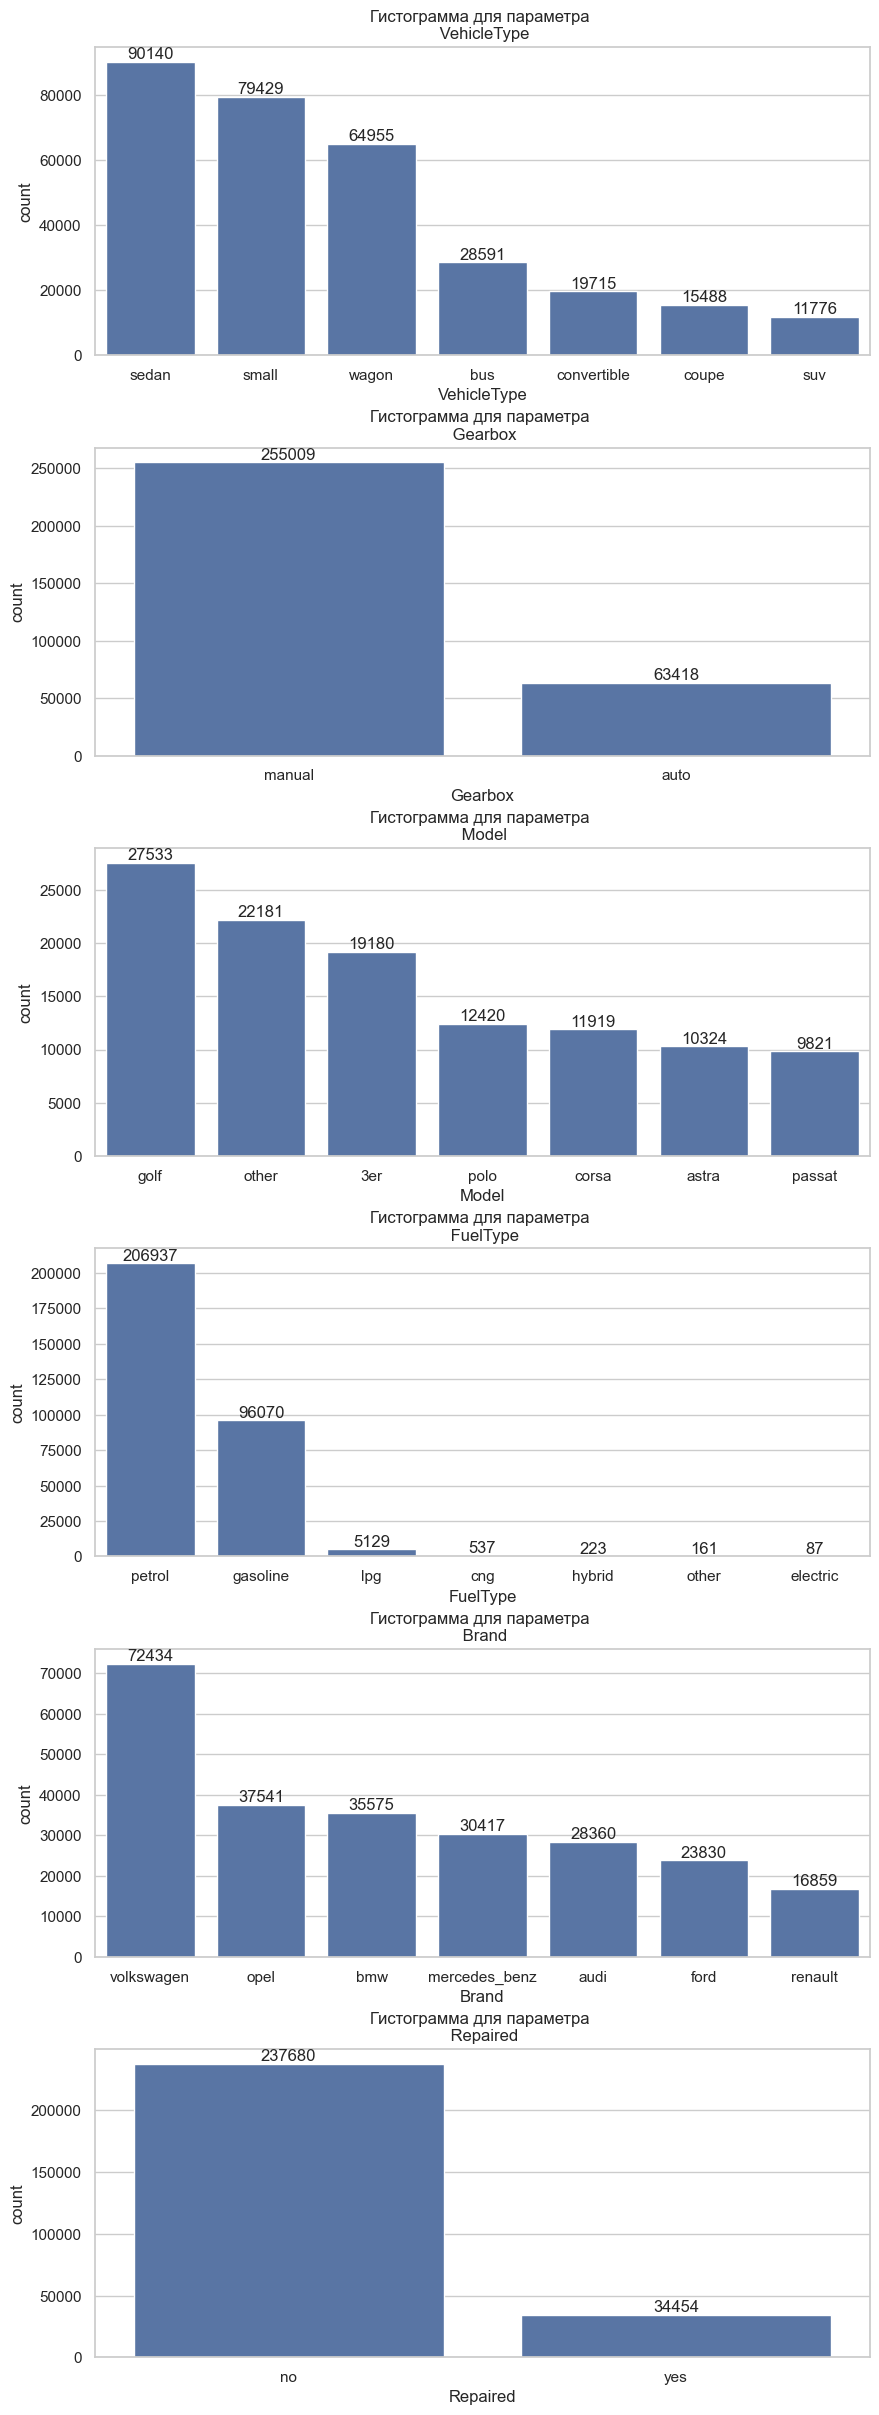

In [22]:
%%time
figures_for_category(cars, category_col)

##### Анализ данных о времени

In [23]:
date_columns = cars.select_dtypes('datetime').columns.to_list()
date_columns

['DateCrawled', 'DateCreated', 'LastSeen']

In [24]:
dates = cars[date_columns]
dates.head(3)

,DateCrawled,DateCreated,LastSeen
0,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46


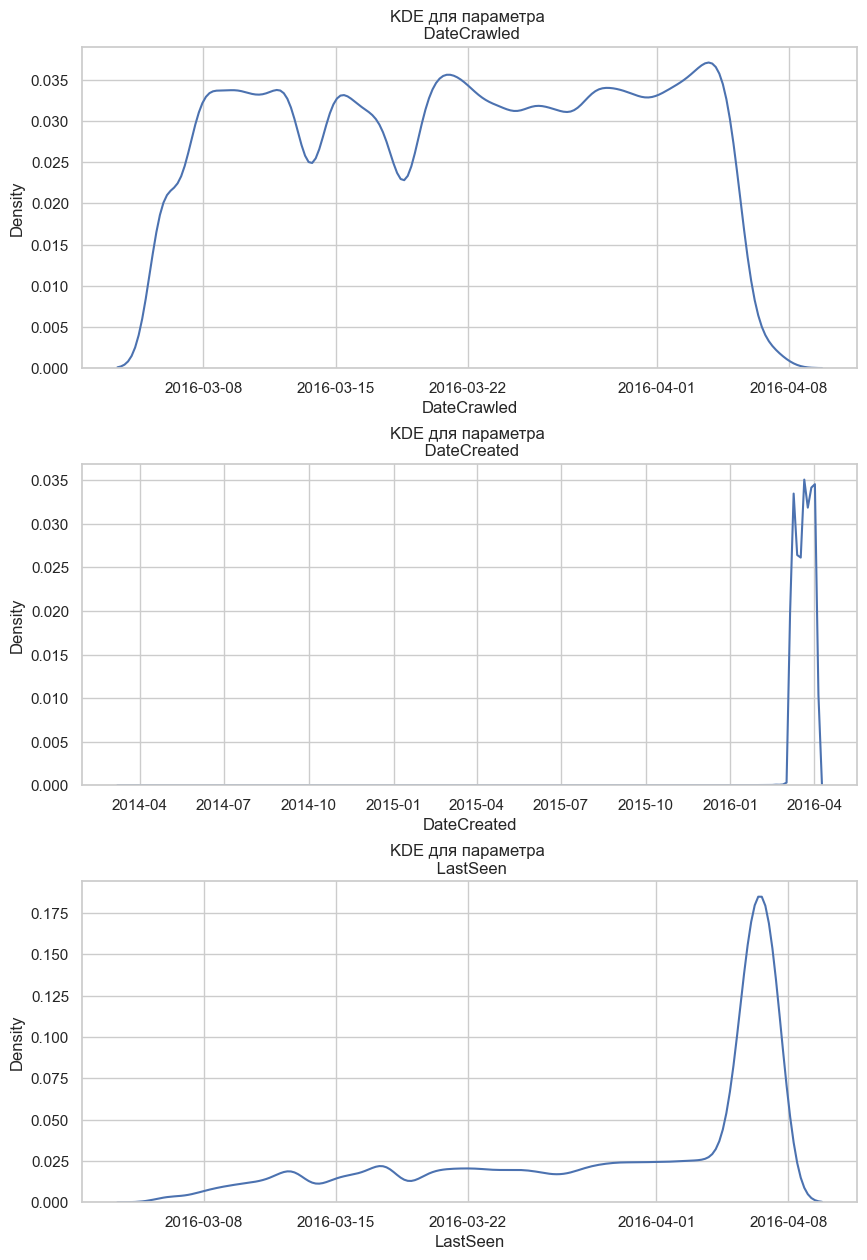

In [25]:
fig, axes = plt.subplots(len(date_columns), 1, figsize=(10,len(date_columns)*5))
i = 0
plt.subplots_adjust(hspace=0.3)
for column in date_columns:
    axes[i].set_title(f'KDE для параметра \n {column}')
    sns.kdeplot(ax = axes[i], data=dates, x=column)
    i += 1

Получили графики для интересующих нас данных, по ним видим распределение всех параметров машин.
Данные по аккаунтам в основном от 2016 года, хотя некоторые регистрировались гораздо раньше - в 2014, при это последний раз заходили в 2016.
Большинство автомобилей стоит меньше 7000 евро, в основном зарегистрированы примерно в 2000 г. и имеют мощность до 200 л.с., пробег указан около 150000 км.
В выборке в основном седаны на ручной коробке передач, в лидерах по количеству бензиновые машины, марка volkswagen, модель golf.

#### Анализ корреляции признаков

In [26]:
phik_data = cars.copy(deep=True)
phik_data[date_columns] = phik_data[date_columns].astype('int64') // 10**9
phik_data.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
0,1458820337,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,1458777600,70435,1459999017
1,1458817125,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,1458777600,66954,1459993610
2,1457959941,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,1457913600,90480,1459860466


In [27]:
phik_data['PostalCode'] = phik_data['PostalCode'].apply(lambda x: x//1000)
phik_data.drop(columns=['DateCrawled', 'DateCreated', 'LastSeen'], inplace=True)
phik_data.head(3)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,PostalCode
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,70
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,66
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,90


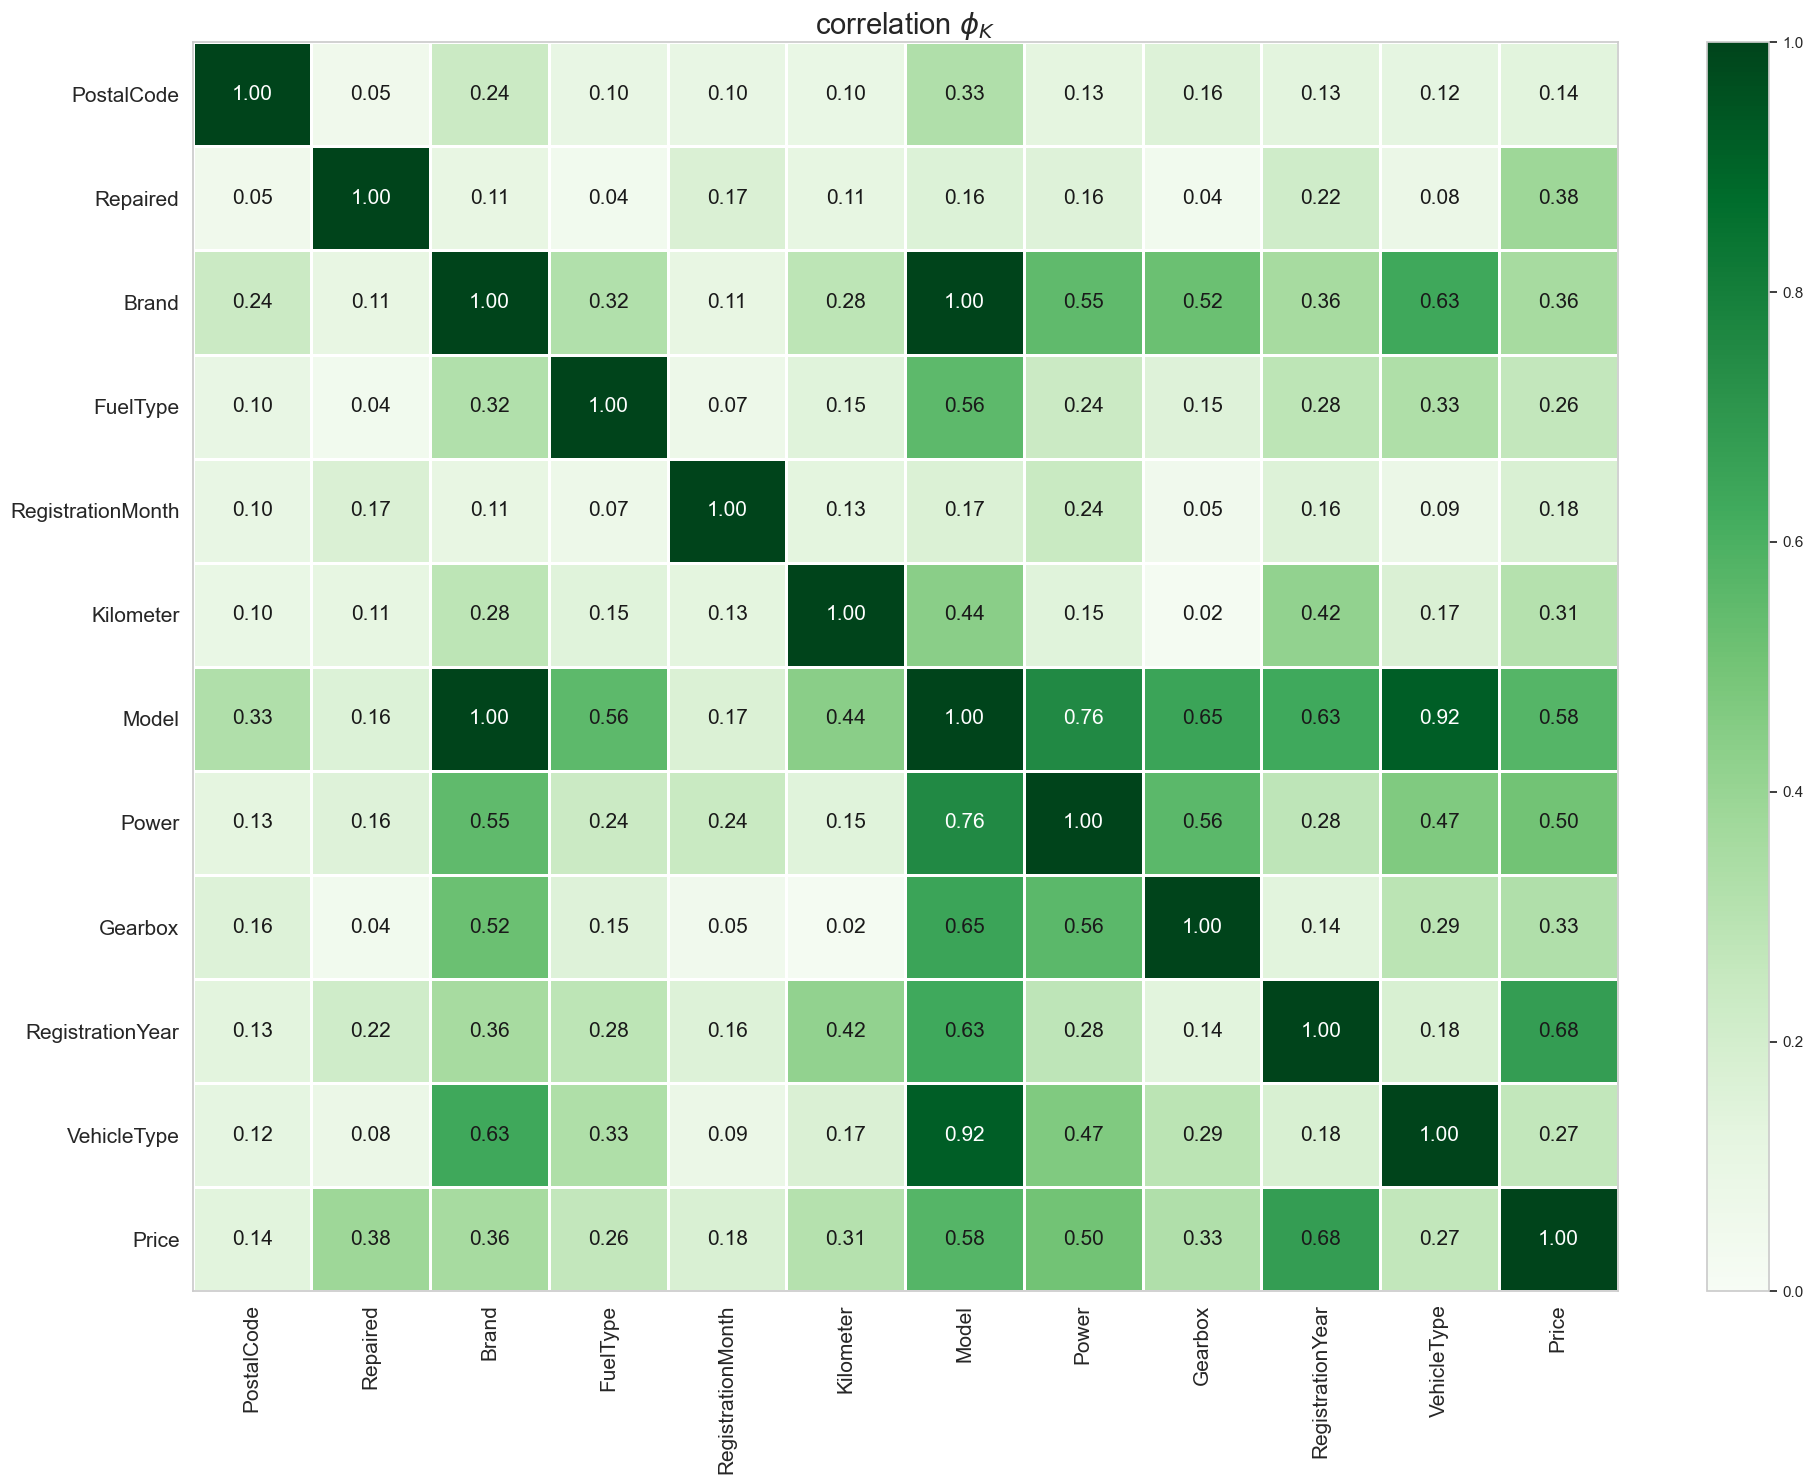

In [28]:
interval_cols = [
 'Price',
 'RegistrationYear',
 'Power',
 'Kilometer',
 'LastSeen']
phik_overview = phik_data.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

По полученной матрице видим, что цена в основном зависит от года, модели, и мощности; практически не зависит от почтового кода. Соответственно, исключаем из модели почтовый код и время, когда пользователь делал что-либо на сайте (так как время посещения сайта и др. никак не могут быть связаны с авто)

### Обучение моделей

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335348 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        335348 non-null  datetime64[ns]
 1   Price              335348 non-null  int64         
 2   VehicleType        313174 non-null  object        
 3   RegistrationYear   335348 non-null  int64         
 4   Gearbox            318427 non-null  object        
 5   Power              335348 non-null  int64         
 6   Model              318763 non-null  object        
 7   Kilometer          335348 non-null  int64         
 8   RegistrationMonth  335348 non-null  int64         
 9   FuelType           309144 non-null  object        
 10  Brand              335348 non-null  object        
 11  Repaired           272134 non-null  object        
 12  DateCreated        335348 non-null  datetime64[ns]
 13  PostalCode         335348 non-null  int64        

In [30]:
X = cars.drop(columns = ['Price', 'DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode'])
y = cars['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=RANDOM_STATE)
X.head(3)

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
0,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN


In [31]:
ohe_columns = [
    'VehicleType',
    'Gearbox',
    'Model',
    'RegistrationMonth',
    'FuelType',
    'Brand',
    'Repaired'    
]

ord_columns = []
ord_columns_order = []

num_columns = ['RegistrationYear',
               'Power',
               'Kilometer'               
]
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan,
            categories=ord_columns_order
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

#### Обучение LightGBM

In [32]:
X_lgb = X.copy(deep=True)
X_lgb[category_col] = X_lgb[category_col].astype('category').apply(lambda x: x.cat.codes)
X_lgb.head(3)

,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
0,-1,1993,1,0,116,150000,0,6,38,-1
1,2,2011,1,190,-1,125000,5,2,1,1
2,6,2004,0,163,117,125000,8,2,14,-1


In [33]:
X_train_lgb, X_test_lgb, y_train, y_test = train_test_split(X_lgb, y, test_size=0.25,
                                                    random_state=RANDOM_STATE)

In [34]:
lgbm = lgb.LGBMRegressor(num_leaves=5, num_boost_round=1000, metric=["l1", "l2"], categorical_feature=[0,2,4,6,7,8,9],
                        random_state=RANDOM_STATE)

In [35]:
cv_score_lgbm = cross_val_score(lgbm, X_train_lgb, y_train, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
print(f'{-np.mean(cv_score_lgbm):.2f}')

1688.53


In [36]:
%%time
start_time = time.perf_counter()

lgbm.fit(X_train_lgb, y_train)

end_time = time.perf_counter()
time_fit_lgb = end_time - start_time

[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] Met negative value in categorical features, will convert it to NaN
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 593
[LightGBM] [Info] Number of data points in the train set: 251511, number of used features: 10
[LightGBM] [Info] Start training from score 4449.300858


C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\envs\practicum\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\ProgramData\anaconda3\envs\practicum\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\ProgramData\anaconda3\envs\practicum\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\envs\practicum\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.Cre

CPU times: total: 27.6 s
Wall time: 1.22 s


In [37]:
start_time = time.perf_counter()

y_pred_lgb = lgbm.predict(X_test_lgb)

end_time = time.perf_counter()
time_predict_lgb = end_time - start_time

lgb_error = root_mean_squared_error(y_test, y_pred_lgb)
lgb_info = f'''LightGBM: Метрика RMSE для модели на тестовых данных {lgb_error:.0f}, 
    метрика RMSE для модели при кросс-валидации {-np.mean(cv_score_lgbm):.2f}, 
    время обучения {time_fit_lgb:.3f}с,
    время предсказания {time_predict_lgb:.3f}с'''
print(lgb_info)

LightGBM: Метрика RMSE для модели на тестовых данных 1684, 
    метрика RMSE для модели при кросс-валидации 1688.53, 
    время обучения 1.220с,
    время предсказания 0.165с


#### Обучение LinearRegression

In [38]:
linear_pipe = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression(n_jobs=-1))
    ]
) 

In [39]:
%%time
start_time = time.perf_counter()

linear_pipe.fit(X_train, y_train)

end_time = time.perf_counter()
time_fit_linear = end_time - start_time

CPU times: total: 39.3 s
Wall time: 3.56 s


In [40]:
cv_score_linear = cross_val_score(linear_pipe, X_train, y_train, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')
print(f'{-np.mean(cv_score_linear):.2f}')

2622.43


In [41]:
start_time = time.perf_counter()

y_pred_linear = linear_pipe.predict(X_test)

end_time = time.perf_counter()
time_predict_linear = end_time - start_time

linear_error = root_mean_squared_error(y_test, y_pred_linear)
linear_info = f'''LinearRegression: Метрика RMSE для модели на тестовых данных {linear_error:.0f}, 
    метрика RMSE для модели при кросс-валидации {-np.mean(cv_score_linear):.2f},
    время обучения {time_fit_linear:.3f}с, 
    время предсказания {time_predict_linear:.3f}с'''
print(linear_info)

LinearRegression: Метрика RMSE для модели на тестовых данных 2624, 
    метрика RMSE для модели при кросс-валидации 2622.43,
    время обучения 3.563с, 
    время предсказания 0.298с


C:\Users\paulv\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


#### Обучение DecisionTreeRegressor

In [42]:
tree_pipe = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
) 

In [43]:
param_grid = [{
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [5, 10, None],
        'models__min_samples_split': [2, 3],
        'models__min_samples_leaf': [1, 2],
        'preprocessor__num': [StandardScaler()]  
    }
] 

In [ ]:
%%time
start_time = time.perf_counter()

grid_search_tree = GridSearchCV(
    tree_pipe, 
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)
grid_search_tree.fit(X_train, y_train)

end_time = time.perf_counter()
time_fit_tree = end_time - start_time
grid_search_tree

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
result_tree = pd.DataFrame(grid_search_tree.cv_results_)
print(result_tree.columns)
output_result_tree = result_tree[['mean_fit_time', 'mean_test_score', 'mean_score_time']].sort_values('mean_test_score', ascending=False)
output_result_tree.head(5)

In [ ]:
start_time = time.perf_counter()

y_pred_tree = grid_search_tree.predict(X_test)

end_time = time.perf_counter()
time_predict_tree = end_time - start_time

tree_error = root_mean_squared_error(y_test, y_pred_tree)
tree_info = f'''DecisionTreeRegressor: Метрика RMSE для модели на тестовых данных {tree_error:.0f}, 
    метрика RMSE для модели при кросс-валидации {-grid_search_tree.best_score_:.2f},
    время обучения {grid_search_tree.refit_time_:.3f}с,
    время предсказания {time_predict_tree:.3f}с'''
print(tree_info)

#### Обучение CatBoost

In [ ]:
X_cbst = X.copy(deep=True)
s_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent').set_output(transform='pandas')
X_cbst = s_imputer.fit_transform(X_cbst)
X_train_cbst, X_test_cbst, y_train, y_test = train_test_split(X_cbst, y, test_size=0.25,
                                                    random_state=RANDOM_STATE)

In [ ]:
%%time
start_time = time.perf_counter()

cbst = CatBoostRegressor(random_seed=RANDOM_STATE, iterations=100)
cbst.fit(X_train_cbst, y_train, cat_features=[0,2,4,6,7,8,9], verbose=20)

end_time = time.perf_counter()
time_fit_cbst = end_time - start_time

In [ ]:
params = {'cat_features':[0,2,4,6,7,8,9], 'verbose':100}
cv_score_cbst = cross_val_score(cbst, X_train_cbst, y_train, cv=5, n_jobs=-1,
                                params=params,
                                scoring='neg_root_mean_squared_error')
print(f'{-np.mean(cv_score_cbst):.2f}')

In [ ]:
start_time = time.perf_counter()

y_pred_cbst = cbst.predict(X_test_cbst)

end_time = time.perf_counter()
time_predict_cbst = end_time - start_time

cbst_error = root_mean_squared_error(y_test, y_pred_cbst)
cbst_info = f'''CatBoostRegressor: Метрика RMSE для модели {cbst_error:.0f},
    метрика RMSE для модели при кросс-валидации {-np.mean(cv_score_cbst):.2f}с, 
    время обучения {time_fit_cbst:.3f}с,
    время предсказания {time_predict_cbst:.3f}с'''
print(cbst_info)

Изменим число итераций

In [ ]:
%%time
start_time = time.perf_counter()

cbst = CatBoostRegressor(random_seed=RANDOM_STATE, iterations=20)
cbst.fit(X_train_cbst, y_train, cat_features=[0,2,4,6,7,8,9], verbose=10)

end_time = time.perf_counter()
time_fit_cbst_2 = end_time - start_time

In [ ]:
params = {'cat_features':[0,2,4,6,7,8,9], 'verbose':10}
cv_score_cbst_2 = cross_val_score(cbst, X_train_cbst, y_train, cv=5, n_jobs=-1,
                                params=params,
                                scoring='neg_root_mean_squared_error')
print(f'{-np.mean(cv_score_cbst_2):.2f}')

In [ ]:
start_time = time.perf_counter()

y_pred_cbst = cbst.predict(X_test_cbst)

end_time = time.perf_counter()
time_predict_cbst_2 = end_time - start_time

cbst_error_2 = root_mean_squared_error(y_test, y_pred_cbst)
cbst_info_2 = f'''CatBoostRegressor: Метрика RMSE для модели {cbst_error_2:.0f},
    метрика RMSE для модели при кросс-валидации {-np.mean(cv_score_cbst_2):.2f}с,
    время обучения {time_fit_cbst_2:.3f}с,
    время предсказания {time_predict_cbst_2:.3f}с'''
print(cbst_info_2)

#### Итоговые результаты моделей


In [ ]:
print(lgb_info + '\n')
print(linear_info + '\n')
print(tree_info + '\n')
print(cbst_info + '\n')
print(cbst_info_2)

### Общие выводы

В результате выполнения проекта были получены данные по машинам. Они были обработаны, удалены дубликаты. Пропуски были заполнены самыми частыми значениями в пайплайнах или уже непосредственно перед созданием модели.

Было исследовано 4 модели, для некоторых также перебирались параметры в пайплайне.
Лучшей по скорости оказалась модель LightGBM: Метрика RMSE для модели составила 1684 (на выделенной тестовой выборке) и 1688 (при кросс-валидации), время обучения 1.4с, время предсказания 0.16с. У нее также лучшая метрика RMSE, которая могла быть еще лучше, если увеличить количество итераций, но это привело бы к увеличению времени обучения модели. Второй по метрике оказалась модель CatBoostRegressor: Метрика RMSE для модели 1733 (1748 при кросс-валидации), время обучения 12с, время предсказания 0.5с. При заданном числе итераций в 20 модель catboost обучилась за 3.9с, при этом метрика RMSE составила 1878 (1882 при кросс-валидации), что не сильно хуже изначальной. Модели линейной регрессии и дерева классификаций показали плохие результаты, они при более длительном обучении (с catboost сравниваем при 20 итерациях) показали более плохие результаты, особенно линейная регрессия - метрика при кросс-валидации 2622, что очень плохо.

В итоге заказчику подойдет лучше всего модель LightGBM - она обучилась быстрее всех и показала почти лучший результат по метрике RMSE (1684). 

